Unimanual reaching to different directions (0, 60, etc) could be different due to different factors -- e.g., reaching to 300 could be curvier/slower/.. than reaching to 0. Or the left and right hands could be systematically different. So, we must first characterize these baseline performances. Reaching with the other hand could also affect these force trajectories. If there is an interference between the reaching of the two hands, the performance will be worse than unimanual for both hands. 

Therefore, I hypothesize that if the reaching directions are 'mathced' or 'mirrored' there won't be a lot of differences. However, if the reaching directions are unmatched, there will be differences compared to unimanual condition. 

Observing the raw raeching trajectories is the first step to gain such insight.

In [1]:
import os
import sys
sys.path.append('/Users/aghavamp/Desktop/Projects')
sys.path.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist')
sys.path.append('/Users/aghavamp/Desktop/Projects/Functional_Fusion')
sys.path.append('/Users/aghavamp/Desktop/Projects/AnatSearchlight')
sys.path.append('/Users/aghavamp/Desktop/Projects/SUITPy')

from pathlib import Path
import glob
import getpass
import importlib

import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import utils
importlib.reload(utils)

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist')
fMRI_behavDir = os.path.join(baseDir,'data','fMRI','behavioural')
train_behavDir = os.path.join(baseDir,'data','training')
anaDir = os.path.join(baseDir,'analysis')
figDir = os.path.join(baseDir,'figures')

path = {'baseDir': baseDir,
        'fMRI_behavDir': fMRI_behavDir,
        'train_behavDir': train_behavDir,
        'anaDir': anaDir}



## Force trajectories for all 48 conditions - TRAINING

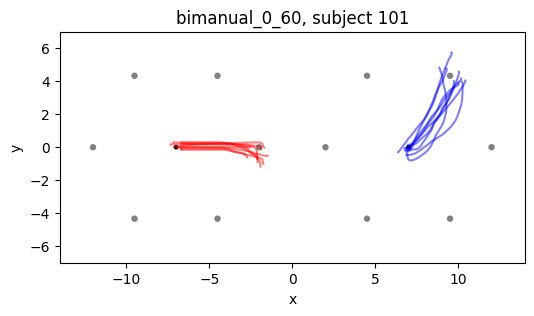

In [4]:
sn_list = [101, 102, 103, 104, 106, 107, 108]
for sn in sn_list:
    D = pd.read_csv(os.path.join(anaDir, f's{sn}_train.csv'))
    D = D[D.GoodMovement == 1]
    D_mov = pd.read_csv(os.path.join(anaDir, f's{sn}_train_mov.csv'))

    conds = D.cond_name.unique()
    left_conds = [cond for cond in conds if 'left_' in cond]
    right_conds = [cond for cond in conds if 'right_' in cond]

    for cond in conds:
        BNs = D.BN[D.cond_name==cond].values.flatten()
        TNs = D.TN[D.cond_name==cond].values.flatten()
        
        # plot kinematic traces for left and right hands:
        fix, ax = plt.subplots(figsize=(6, 3))
        utils.please.draw_board(ax=ax)
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[idx_gocue:idx_endReach]
            radius_r = trial_mov['mov_6'].values.flatten()[idx_gocue:idx_endReach]
            angle_l = trial_mov['mov_7'].values.flatten()[idx_gocue:idx_endReach]
            angle_r = trial_mov['mov_8'].values.flatten()[idx_gocue:idx_endReach]
            
            radius = 5
            x_offset = radius+2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

            plt.plot(x_l, y_l, color='red', alpha=0.5)
            plt.plot(x_r, y_r, color='blue', alpha=0.5)
        plt.title(f'{cond}, subject {sn}')
        plt.xlabel('x')
        plt.ylabel('y')
        ax.set_xlim(-14, 14)
        ax.set_ylim(-7, 7)
        plt.savefig(os.path.join(figDir, 'reach_trajectories', 'train', f'{cond}_s{sn}.pdf'), bbox_inches="tight")
        if cond == 'bimanual_0_60' and sn==101: # show for one of the conditions as an example
            plt.show()
        else:
            plt.close()

## Unimanual trajectories

In [ ]:
sn_list = [101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]

colors = [cm.Paired(8),cm.Paired(8),cm.Paired(8),cm.Paired(8),cm.Paired(8),cm.Paired(8)]
for sn in sn_list:
    D = pd.read_csv(os.path.join(anaDir, f's{sn}_scan.csv'))
    D = D[D.GoodMovement == 1]
    D_mov = pd.read_csv(os.path.join(anaDir, f's{sn}_scan_mov.csv'))
    
    left_conds = ['left_0', 'left_60', 'left_120', 'left_180', 'left_240', 'left_300']
    fig, ax = plt.subplots(figsize=(3.2, 1.65))
    for cond in left_conds:
        BNs = D.BN[D.cond_name==cond].values.flatten()
        TNs = D.TN[D.cond_name==cond].values.flatten()
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[idx_gocue:idx_endReach]
            radius_r = trial_mov['mov_6'].values.flatten()[idx_gocue:idx_endReach]
            angle_l = trial_mov['mov_7'].values.flatten()[idx_gocue:idx_endReach]
            angle_r = trial_mov['mov_8'].values.flatten()[idx_gocue:idx_endReach]
            
            radius = 5
            x_offset = radius + 2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

            plt.plot(x_l, y_l, color=colors[left_conds.index(cond)], alpha=1, lw=0.5)
            plt.plot(x_r, y_r, color=colors[left_conds.index(cond)], alpha=1, lw=0.5)

    utils.please.draw_board(ax=ax, radius=5, zorder=999)
    ax.set_xlim(-14, 14)
    ax.set_ylim(-7, 7)
    # save figure:
    plt.savefig(os.path.join(figDir, 'reach_trajectories', f'left_{sn}.pdf'), bbox_inches="tight")
    plt.close()

    right_conds = ['right_0', 'right_60', 'right_120', 'right_180', 'right_240', 'right_300']
    # select 6 colors:
    # colors = [cm.Paired(2),cm.Paired(2),cm.Paired(9),cm.Paired(9),cm.Paired(9),cm.Paired(2)]
    # colors = [cm.Paired(8),cm.Paired(8),cm.Paired(8),cm.Paired(8),cm.Paired(8),cm.Paired(8)]
    fig, ax = plt.subplots(figsize=(3.2, 1.65))
    for cond in right_conds:
        BNs = D.BN[D.cond_name==cond].values.flatten()
        TNs = D.TN[D.cond_name==cond].values.flatten()
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[idx_gocue:idx_endReach]
            radius_r = trial_mov['mov_6'].values.flatten()[idx_gocue:idx_endReach]
            angle_l = trial_mov['mov_7'].values.flatten()[idx_gocue:idx_endReach]
            angle_r = trial_mov['mov_8'].values.flatten()[idx_gocue:idx_endReach]
            
            radius = 5
            x_offset = radius + 2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

            plt.plot(x_l, y_l, color=colors[right_conds.index(cond)], alpha=1, lw=0.5)
            plt.plot(x_r, y_r, color=colors[right_conds.index(cond)], alpha=1, lw=0.5)

    utils.please.draw_board(ax=ax, radius=5, zorder=999)
    ax.set_xlim(-14, 14)
    ax.set_ylim(-7, 7)
    # save figure:
    plt.savefig(os.path.join(figDir, 'reach_trajectories', f'right_{sn}.pdf'), bbox_inches="tight")
    plt.close()



## Bimanual vs Unimanual trajectories

In [11]:
sn_list = [101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
# sn_list = [101]

colors = {'bimanual': '#000000', 'unimanual': cm.Paired(8)}
zorders = {'bimanual': 1, 'unimanual': 2}
alphas = {'bimanual': 0.4, 'unimanual': 0.8}
for sn in sn_list:
    D = pd.read_csv(os.path.join(anaDir, f's{sn}_scan.csv'))
    D = D[D.GoodMovement == 1]
    D_mov = pd.read_csv(os.path.join(anaDir, f's{sn}_scan_mov.csv'))
    
    BNs = D.BN.values.flatten()
    TNs = D.TN.values.flatten()
    
    fig, ax = plt.subplots(figsize=(3.2, 1.65))
    for i in range(len(BNs)):
        BN = BNs[i]
        TN = TNs[i]
        cond_name = D.cond_name[(D.BN==BN) & (D.TN==TN)].values[0]
        if 'bi' in cond_name:
            trial_type = 'bimanual'
        else:
            trial_type = 'unimanual'

        idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
        idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]

        # kinematic traces:
        trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
        radius_l = trial_mov['mov_5'].values.flatten()[idx_gocue:idx_endReach]
        radius_r = trial_mov['mov_6'].values.flatten()[idx_gocue:idx_endReach]
        angle_l = trial_mov['mov_7'].values.flatten()[idx_gocue:idx_endReach]
        angle_r = trial_mov['mov_8'].values.flatten()[idx_gocue:idx_endReach]

        radius = 5
        x_offset = radius + 2
        y_offset = 0
        x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
        y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
        x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
        y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

        plt.plot(x_l, y_l, color=colors[trial_type], alpha=alphas[trial_type], lw=0.5, zorder=zorders[trial_type])
        plt.plot(x_r, y_r, color=colors[trial_type], alpha=alphas[trial_type], lw=0.5, zorder=zorders[trial_type])

    utils.please.draw_board(ax=ax, radius=5, zorder=999)
    ax.set_xlim(-14, 14)
    ax.set_ylim(-7, 7)
    # save figure:
    plt.savefig(os.path.join(figDir, 'reach_trajectories', f'BiVsUni_{sn}.pdf'), bbox_inches="tight")
    plt.close()



## Unimanual intended vs unintended movements

In [14]:
sn_list = [101, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
D = pd.read_csv(os.path.join(anaDir, f's{101}_scan.csv'))

uni_conds = ['left_0', 'left_60', 'left_120', 'left_180', 'left_240', 'left_300',
             'right_0', 'right_60', 'right_120', 'right_180', 'right_240', 'right_300']
target_angles = {'0': np.array([1, 0]), 
                 '60': np.array([0.5, np.sqrt(3)/2]), 
                 '120': np.array([-0.5, np.sqrt(3)/2]), 
                 '180': np.array([-1, 0]), 
                 '240': np.array([-0.5, -np.sqrt(3)/2]), 
                 '300': np.array([0.5, -np.sqrt(3)/2])}

df = {'sn': [], 'cond': [], 'hand':[], 'is_instructed': [], 'range':[], 'angle':[], 'BN': [], 'TN': []}
for sn in sn_list:
    D = pd.read_csv(os.path.join(anaDir, f's{sn}_scan.csv'))
    D = D[D.GoodMovement == 1]
    D_mov = pd.read_csv(os.path.join(anaDir, f's{sn}_scan_mov.csv'))
    for cond in uni_conds:
        BNs = D.BN[D.cond_name==cond].values.flatten()
        TNs = D.TN[D.cond_name==cond].values.flatten()
        
        # loop over trials of the subject:
        n_trials = len(BNs)
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]

            t1 = idx_gocue
            t2 = idx_endReach

            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[t1:t2]
            radius_r = trial_mov['mov_6'].values.flatten()[t1:t2]
            angle_l = trial_mov['mov_7'].values.flatten()[t1:t2]
            angle_r = trial_mov['mov_8'].values.flatten()[t1:t2]
            
            radius = 5
            x_offset = radius + 2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

            # which is the uninstructed hand?
            if 'left' in cond:
                x_un = x_r
                y_un = y_r
                x_in = x_l
                y_in = y_l
            else:
                x_un = x_l
                y_un = y_l
                x_in = x_r
                y_in = y_r
            
            # find the index of the maximum distance of unintended hand from the start position:
            start_x_un = x_un[0]
            start_y_un = y_un[0]
            dists_un = np.sqrt((x_un - start_x_un)**2 + (y_un - start_y_un)**2)
            max_dist_un = np.max(dists_un) # max range of unintended hand
            idx_maxrange_un = np.argmax(dists_un) # index of max range

            start_x_in = x_in[0]
            start_y_in = y_in[0]
            dists_in = np.sqrt((x_in - start_x_in)**2 + (y_in - start_y_in)**2)
            max_dist_in = np.max(dists_in) # max range of instructed hand
            idx_maxrange_in = np.argmax(dists_in) # index of max range
            # max_dist_in = np.sqrt((x_in[-1] - x_in[0])**2 + (y_in[-1] - y_in[0])**2) # range from go-cue to end of reach

            # angle of both hands at max range:
            dx_un = x_un[idx_maxrange_un] - start_x_un
            dy_un = y_un[idx_maxrange_un] - start_y_un
            angle_un = np.rad2deg(np.arctan2(dy_un, dx_un))

            dx_in = x_in[idx_maxrange_in] - start_x_in
            dy_in = y_in[idx_maxrange_in] - start_y_in
            angle_in = np.rad2deg(np.arctan2(dy_in, dx_in))

            # find the angle difference from target:
            target_angle = int(cond.split('_')[1])
            angle_diff_un = angle_un - target_angle
            angle_diff_in = angle_in - target_angle
            # adjust angle diff to be within -180 to 180
            if angle_diff_un > 180:
                angle_diff_un -= 360
            elif angle_diff_un < -180:
                angle_diff_un += 360
            if angle_diff_in > 180:
                angle_diff_in -= 360
            elif angle_diff_in < -180:
                angle_diff_in += 360

            # store the uninstructed hand movement data:
            df['sn'].append(sn)
            df['cond'].append(cond)
            df['hand'].append('right' if 'left' in cond else 'left')
            df['is_instructed'].append(0)
            df['range'].append(max_dist_un)
            df['angle'].append(angle_diff_un)
            df['BN'].append(BN)
            df['TN'].append(TN)

            # store the instructed hand movement data:
            df['sn'].append(sn)
            df['cond'].append(cond)
            df['hand'].append('left' if 'left' in cond else 'right')
            df['is_instructed'].append(1)
            df['range'].append(max_dist_in)
            df['angle'].append(angle_diff_in)
            df['BN'].append(BN)
            df['TN'].append(TN)

df = pd.DataFrame(df)
df.to_pickle(os.path.join(anaDir, 'uninstructed_hand_movements.pkl'))



### plot

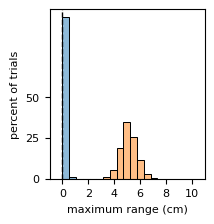

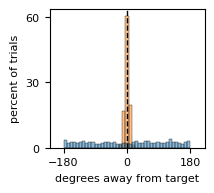

avg unintstructed = 0.021 cm +- 0.008 SEM
avg instructed = 3.588 cm +- 0.032 SEM

Relative uninstructed/instructed avg: 0.604% +- 0.236 SEM
t-test left vs right uninstructed ranges: t(11)=-1.331, p=0.210


In [55]:
# plot the distribution of uninstructed hand movement ranges:
df = pd.read_pickle(os.path.join(anaDir, 'uninstructed_hand_movements.pkl'))
plt.figure(figsize=(2,2.2))
sns.histplot(data=df, x='range', hue='is_instructed', stat='percent', common_norm=False, legend=False)
plt.axvline(0, color='black', linestyle='--', lw=1, zorder=1)
plt.ylabel('percent of trials')
plt.xticks([0,2,4,6,8,10])
plt.yticks([0,25,50])
plt.xlim([-1, 11])
plt.xlabel('maximum range (cm)')
plt.savefig(os.path.join(figDir, 'reach_trajectories', f'uninstructed_hand_movement_ranges.pdf'), bbox_inches="tight")
plt.show()

# plot the distribution of uninstructed hand movement angles:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(2,1.8))
sns.histplot(data=df, x='angle', hue='is_instructed', stat='percent', common_norm=False, legend=False, bins=41)
plt.axvline(0, color='black', linestyle='--', lw=1, zorder=1)
plt.xlabel('degrees away from target')
plt.ylabel('percent of trials')
plt.xticks([-180, 0, 180])
plt.yticks([0,30,60])
plt.xlim([-220, 220])
# plt.xlabel('degrees away from target')
plt.savefig(os.path.join(figDir, 'reach_trajectories', f'uninstructed_hand_movement_angles.pdf'), bbox_inches="tight")
plt.show()

# print the relative range of uninstructed hand movements to instructed hand movements separate for left and right hands:
# average the trials:
df_grouped = df.groupby(['sn', 'hand', 'is_instructed']).agg({'range': 'mean'}).reset_index()

left_un = df_grouped[(df_grouped.is_instructed==0) & (df_grouped.hand=='left')]['range'].values
left_in = df_grouped[(df_grouped.is_instructed==1) & (df_grouped.hand=='left')]['range'].values
right_un = df_grouped[(df_grouped.is_instructed==0) & (df_grouped.hand=='right')]['range'].values
right_in = df_grouped[(df_grouped.is_instructed==1) & (df_grouped.hand=='right')]['range'].values
avg_un = (left_un + right_un) / 2
avg_in = (left_in + right_in) / 2
print(f'avg unintstructed = {np.mean(avg_un*3.5/5):.3f} cm +- {np.std(avg_un*3.5/5)/np.sqrt(len(avg_un)):.3f} SEM')
print(f'avg instructed = {np.mean(avg_in*3.5/5):.3f} cm +- {np.std(avg_in*3.5/5)/np.sqrt(len(avg_in)):.3f} SEM\n')

# print(f'Uninstructed left hand movement range: {np.mean(left_un):.3f} cm')
# print(f'Instructed left hand movement range: {np.mean(left_in):.3f} cm')
# print(f'Uninstructed right hand movement range: {np.mean(right_un):.3f} cm')
# print(f'Instructed right hand movement range: {np.mean(right_in):.3f} cm')

# relative ranges:
rel_range_left = 100 * left_un / left_in
rel_range_right = 100 * right_un / right_in
rel_avg = rel_range_left/2 + rel_range_right/2
# print(f'Relative uninstructed left: {np.mean(rel_range_left):.3f}% +- {np.std(rel_range_left)/np.sqrt(len(rel_range_left)):.3f} SEM')
# print(f'Relative uninstructed right: {np.mean(rel_range_right):.3f}% +- {np.std(rel_range_right)/np.sqrt(len(rel_range_right)):.3f} SEM')
print(f'Relative uninstructed/instructed avg: {np.mean(rel_avg):.3f}% +- {np.std(rel_avg)/np.sqrt(len(rel_avg)):.3f} SEM')

# t-test between left and right uninstructed ranges:
ttest_rel = stats.ttest_rel(rel_range_left, rel_range_right, alternative='two-sided')
print(f't-test left vs right uninstructed ranges: t({len(rel_range_left)-1})={ttest_rel.statistic:.3f}, p={ttest_rel.pvalue:.3f}')



## angle vs target for uni, bi (intrinsic, extrinsic, unrelated)

### calculate the angles

In [57]:
sn_list = [101, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
uni_conds = ['left_0', 'left_60', 'left_120', 'left_180', 'left_240', 'left_300',
             'right_0', 'right_60', 'right_120', 'right_180', 'right_240', 'right_300']
target_angles = {'0': np.array([1, 0]), 
                 '60': np.array([0.5, np.sqrt(3)/2]), 
                 '120': np.array([-0.5, np.sqrt(3)/2]), 
                 '180': np.array([-1, 0]), 
                 '240': np.array([-0.5, -np.sqrt(3)/2]), 
                 '300': np.array([0.5, -np.sqrt(3)/2])}

df = {'sn': [], 'hand': [], 'cond_name': [], 'type': [], 'target_angle': [], 'reach_angle': [], 'diff': [], 'BN': [], 'TN': []}
for sn in sn_list:
    D = pd.read_csv(os.path.join(anaDir, f's{sn}_scan.csv'))
    D = D[D.GoodMovement == 1]
    D_mov = pd.read_csv(os.path.join(anaDir, f's{sn}_scan_mov.csv'))
    
    # loop on each hand going to each direction:
    for cond in uni_conds:
        # unimanual:
        BNs = D.BN[D.cond_name==cond].values.flatten()
        TNs = D.TN[D.cond_name==cond].values.flatten()
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            t1 = idx_gocue
            t2 = idx_endReach

            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[t1:t2]
            radius_r = trial_mov['mov_6'].values.flatten()[t1:t2]
            angle_l = trial_mov['mov_7'].values.flatten()[t1:t2]
            angle_r = trial_mov['mov_8'].values.flatten()[t1:t2]
            
            radius = 5
            x_offset = radius + 2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset

            # which is the instructed hand?
            if 'left' in cond:
                x = x_l
                y = y_l
            else:
                x = x_r
                y = y_r
            
            # find the index of the maximum distance of unintended hand from the start position:
            start_x = x[0]
            start_y = y[0]
            dists = np.sqrt((x - start_x)**2 + (y - start_y)**2)
            max_dist = np.max(dists) # max range of unintended hand
            idx_maxrange = np.argmax(dists) # index of max range

            dx = x[idx_maxrange] - x[0]
            dy = y[idx_maxrange] - y[0]
            angle = np.rad2deg(np.arctan2(dy, dx))

            # find the angle difference from target:
            target_angle = int(cond.split('_')[1])
            angle_diff = angle - target_angle
            # adjust angle diff to be within -180 to 180
            if angle_diff > 180:
                angle_diff -= 360
            elif angle_diff < -180:
                angle_diff += 360

            # store the data:
            df['sn'].append(sn)
            df['cond_name'].append(cond)
            df['type'].append('unimanual')
            df['hand'].append('left' if 'left' in cond else 'right')
            df['target_angle'].append(target_angle)
            df['reach_angle'].append(angle)
            df['diff'].append(angle_diff)
            df['BN'].append(BN)
            df['TN'].append(TN)

        # bimanual - left hand:
        bimanual_cond_idx = D.cond_name.str.contains(f"bimanual_{cond.split('_')[1]}_")
        BNs = D.BN[bimanual_cond_idx].values.flatten()
        TNs = D.TN[bimanual_cond_idx].values.flatten()
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            cond_name = D.cond_name[(D.BN==BN) & (D.TN==TN)].values[0]

            # determine intrinsic, extrinsic, or unrelated condition:
            parts = cond_name.split('_')
            left_angle = int(parts[1])
            right_angle = int(parts[2])
            if left_angle == right_angle:
                relation = 'extrinsic'
            elif left_angle+right_angle == 180 or left_angle+right_angle == 540:
                relation = 'intrinsic'
            else:
                relation = 'unrelated'

            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            t1 = idx_gocue
            t2 = idx_endReach

            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[t1:t2]
            radius_r = trial_mov['mov_6'].values.flatten()[t1:t2]
            angle_l = trial_mov['mov_7'].values.flatten()[t1:t2]
            angle_r = trial_mov['mov_8'].values.flatten()[t1:t2]
            
            radius = 5
            x_offset = radius + 2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset
            
            # we are focusing on left hand:
            x = x_l
            y = y_l
        
            # find the index of the maximum distance of unintended hand from the start position:
            start_x = x[0]
            start_y = y[0]
            dists = np.sqrt((x - start_x)**2 + (y - start_y)**2)
            max_dist = np.max(dists) # max range of unintended hand
            idx_maxrange = np.argmax(dists) # index of max range

            dx = x[idx_maxrange] - x[0]
            dy = y[idx_maxrange] - y[0]
            angle = np.rad2deg(np.arctan2(dy, dx))

            # find the angle difference from target:
            target_angle = int(cond.split('_')[1])
            angle_diff = angle - target_angle
            # adjust angle diff to be within -180 to 180
            if angle_diff > 180:
                angle_diff -= 360
            elif angle_diff < -180:
                angle_diff += 360

            # store the data:
            df['sn'].append(sn)
            df['cond_name'].append(cond_name)
            df['type'].append(relation)
            df['hand'].append('left')
            df['target_angle'].append(target_angle)
            df['reach_angle'].append(angle)
            df['diff'].append(angle_diff)
            df['BN'].append(BN)
            df['TN'].append(TN)


        # bimanual - right hand:
        suffix = cond.split('_')[1]
        bimanual_cond_idx = D.index[D.cond_name.str.match(rf'^bimanual_.*_{suffix}$')]
        BNs = D.BN[bimanual_cond_idx].values.flatten()
        TNs = D.TN[bimanual_cond_idx].values.flatten()
        for i in range(len(BNs)):
            BN = BNs[i]
            TN = TNs[i]
            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            cond_name = D.cond_name[(D.BN==BN) & (D.TN==TN)].values[0]

            # determine intrinsic, extrinsic, or unrelated condition:
            parts = cond_name.split('_')
            left_angle = int(parts[1])
            right_angle = int(parts[2])
            if left_angle == right_angle:
                relation = 'extrinsic'
            elif left_angle+right_angle == 180 or left_angle+right_angle == 540:
                relation = 'intrinsic'
            else:
                relation = 'unrelated'

            idx_gocue = D.idx_gocue[(D.BN==BN) & (D.TN==TN)].values[0]
            idx_endReach = D.idx_endReach[(D.BN==BN) & (D.TN==TN)].values[0]
            
            t1 = idx_gocue
            t2 = idx_endReach

            # kinematic traces:
            trial_mov = D_mov[(D_mov.BN==BN) & (D_mov.TN==TN)]
            radius_l = trial_mov['mov_5'].values.flatten()[t1:t2]
            radius_r = trial_mov['mov_6'].values.flatten()[t1:t2]
            angle_l = trial_mov['mov_7'].values.flatten()[t1:t2]
            angle_r = trial_mov['mov_8'].values.flatten()[t1:t2]
            
            radius = 5
            x_offset = radius + 2
            y_offset = 0
            x_l = radius_l * np.cos(np.deg2rad(angle_l)) - x_offset
            y_l = radius_l * np.sin(np.deg2rad(angle_l)) + y_offset
            x_r = radius_r * np.cos(np.deg2rad(angle_r)) + x_offset
            y_r = radius_r * np.sin(np.deg2rad(angle_r)) + y_offset
            
            # we are focusing on left hand:
            x = x_r
            y = y_r
        
            # find the index of the maximum distance of unintended hand from the start position:
            start_x = x[0]
            start_y = y[0]
            dists = np.sqrt((x - start_x)**2 + (y - start_y)**2)
            max_dist = np.max(dists) # max range of unintended hand
            idx_maxrange = np.argmax(dists) # index of max range

            dx = x[idx_maxrange] - x[0]
            dy = y[idx_maxrange] - y[0]
            angle = np.rad2deg(np.arctan2(dy, dx))

            # find the angle difference from target:
            target_angle = int(cond.split('_')[1])
            angle_diff = angle - target_angle
            # adjust angle diff to be within -180 to 180
            if angle_diff > 180:
                angle_diff -= 360
            elif angle_diff < -180:
                angle_diff += 360
            
            # store the data:
            df['sn'].append(sn)
            df['cond_name'].append(cond_name)
            df['type'].append(relation)
            df['hand'].append('right')
            df['target_angle'].append(target_angle)
            df['reach_angle'].append(angle)
            df['diff'].append(angle_diff)
            df['BN'].append(BN)
            df['TN'].append(TN)

df = pd.DataFrame(df)



### plot

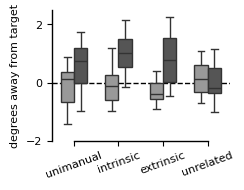

left hand:
  unimanual vs intrinsic: t(11)=-0.503, p=0.625
  unimanual vs extrinsic: t(11)=1.048, p=0.317
  unimanual vs unrelated: t(11)=-1.421, p=0.183

right hand:
  unimanual vs intrinsic: t(11)=-1.585, p=0.141
  unimanual vs extrinsic: t(11)=-0.804, p=0.438
  unimanual vs unrelated: t(11)=3.755, p=0.003



In [ ]:
df_group = df.groupby(['type', 'hand', 'sn']).agg({'diff': ['mean', 'std', 'count']}).reset_index()

# boxplot:
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(2.3,1.7))
sns.boxplot(data=df_group, x='type', y=('diff', 'mean'), hue='hand', legend=False, fill=True, fliersize=0, 
            hue_order=['left','right'], order=['unimanual','intrinsic','extrinsic','unrelated'], gap=0, width=0.6, palette=['#999999','#555555'], ax=ax)
plt.axhline(0, color='black', linestyle='--', lw=1, zorder=1)
plt.ylabel('degrees away from target')
plt.xlabel('')
plt.ylim((-1.5,2.5))
ax.set_yticks([-2,0,2])
# angle the xticks:
plt.xticks(rotation=20)
utils.please.make_it_pretty(ax=ax)
plt.savefig(os.path.join(figDir, 'reach_trajectories', f'reach_angles_comparison.pdf'), bbox_inches="tight")
plt.show()



### t-test

In [ ]:
# overall unimanual vs bimanual 
df_group = df.groupby(['type', 'sn']).agg({'diff': 'mean'}).reset_index()

# average anything other than unimanual:
df_group['type'] = df_group['type'].replace({'intrinsic': 'bimanual', 'extrinsic': 'bimanual', 'unrelated': 'bimanual'})
df_group = df_group.groupby(['type', 'sn']).agg({'diff': 'mean'}).reset_index()

# test unimanual vs bimanual:
unimanual_vals = df_group[df_group.type=='unimanual']['diff'].values
bimanual_vals = df_group[df_group.type=='bimanual']['diff'].values
ttest_result = stats.ttest_rel(unimanual_vals, bimanual_vals, alternative='two-sided')
print(f'unimanual vs bimanual: t({len(unimanual_vals)-1})={ttest_result.statistic:.3f}, p={ttest_result.pvalue:.3f}')


# unrelated vs avreage of intrinsic and extrinsic:
df_group2 = df.groupby(['type', 'sn']).agg({'diff': 'mean'}).reset_index()
intrinsic_vals = df_group2[df_group2.type=='intrinsic']['diff'].values
extrinsic_vals = df_group2[df_group2.type=='extrinsic']['diff'].values
avg_vals = (intrinsic_vals + extrinsic_vals) / 2
unrelated_vals = df_group2[df_group2.type=='unrelated']['diff'].values
ttest_result2 = stats.ttest_rel(unrelated_vals, avg_vals, alternative='two-sided')
print(f'unrelated vs average of intrinsic and extrinsic: t({len(unrelated_vals)-1})={ttest_result2.statistic:.3f}, p={ttest_result2.pvalue:.3f}')
print()

# rm-ANOVA hand and condition type:
from statsmodels.stats.anova import AnovaRM
df_anova = df.groupby(['sn', 'hand', 'type']).agg({'diff': 'mean'}).reset_index()
aov = AnovaRM(df_anova, 'diff', 'sn', within=['hand', 'type'])
res = aov.fit()
print(res)



unimanual vs bimanual: t(11)=-0.452, p=0.660
unrelated vs average of intrinsic and extrinsic: t(11)=-1.608, p=0.136

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
hand       5.9533 1.0000 11.0000 0.0328
type       1.9358 3.0000 33.0000 0.1430
hand:type  4.1267 3.0000 33.0000 0.0137

